In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')

In [3]:
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [4]:
df.shape

(529223, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529223 entries, 0 to 529222
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               529223 non-null  object
 1   number_of_strikes  529223 non-null  int64 
 2   center_point_geom  529223 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.1+ MB


In [7]:
df['date']= pd.to_datetime(df['date'])

In [8]:
df.groupby(['date']).sum().sort_values('number_of_strikes',ascending=False).head(10)

,number_of_strikes,center_point_geom
date,,
2018-08-29,876480,POINT(-85.7 29.1)POINT(-85.6 29.1)POINT(-84.5 ...
2018-08-17,755949,POINT(-80.6 20.3)POINT(-80.5 20.3)POINT(-80.4 ...
2018-08-28,750729,POINT(-108.2 28)POINT(-108.1 28)POINT(-108 28)...
2018-08-30,652608,POINT(-75.7 19)POINT(-75.6 19)POINT(-78 20)POI...
2018-08-27,649740,POINT(-109 24.8)POINT(-108 24.8)POINT(-88.1 24...
2018-08-19,600231,POINT(-73 35)POINT(-103 35)POINT(-101 35)POINT...
2018-08-18,561498,POINT(-110.7 46)POINT(-104.9 46)POINT(-115.1 4...
2018-08-31,549612,POINT(-95.2 48.4)POINT(-96 48.1)POINT(-96.1 48...
2018-08-16,533028,POINT(-97 20)POINT(-77 20)POINT(-96.9 20)POINT...


In [9]:
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [11]:
df.groupby(['month'])['number_of_strikes'].sum().sort_values(ascending=False).head(12)

,number_of_strikes
month,
8,11083607
7,4890603
6,4095825
5,2238931
2,1751617
9,1358207
4,876613
1,619691
3,478382


In [12]:
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()


,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


In [19]:
df_by_month = df.groupby(['month','month_txt'])['number_of_strikes'].sum().sort_values(ascending=True).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,12,Dec,90990
1,11,Nov,142246
2,10,Oct,439896
3,3,Mar,478382
4,1,Jan,619691
5,4,Apr,876613
6,9,Sep,1358207
7,2,Feb,1751617
8,5,May,2238931
9,6,Jun,4095825


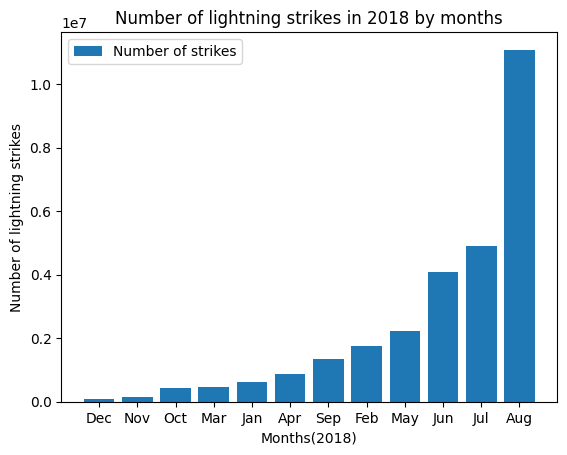

In [21]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()